<a href="https://colab.research.google.com/github/tranquil-morning/CA-deeplearning/blob/main/05_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4992 - acc: 0.8241 - val_loss: 0.4267 - val_acc: 0.8474
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3730 - acc: 0.8642 - val_loss: 0.4020 - val_acc: 0.8558
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3323 - acc: 0.8784 - val_loss: 0.3677 - val_acc: 0.8678


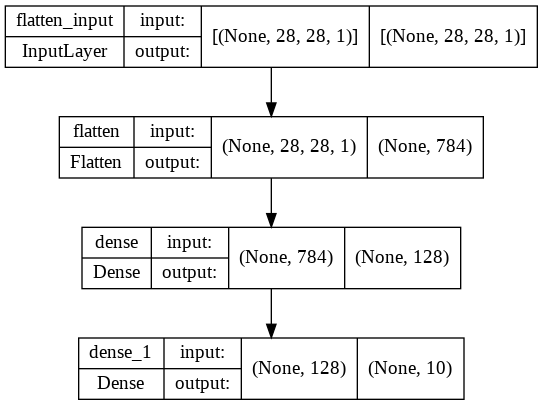

In [2]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

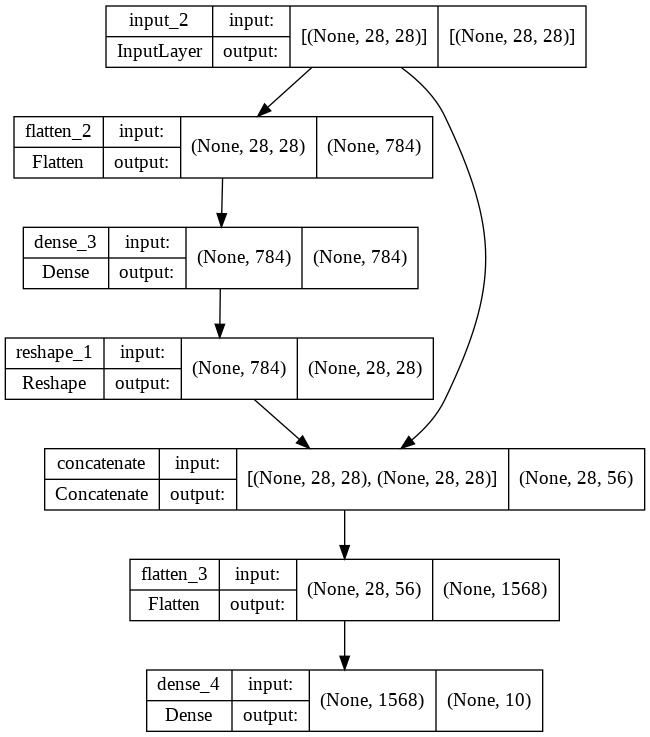

In [4]:
input1 = tf.keras.layers.Input(shape = [28, 28])
flatten1 = tf.keras.layers.Flatten()(input1)
dense1 = tf.keras.layers.Dense(28*28, activation = "relu")(flatten1)
reshape1 = tf.keras.layers.Reshape((28, 28))(dense1)

concat1 = tf.keras.layers.Concatenate()([input1, reshape1])
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation = "softmax")(flatten2)

model2 = tf.keras.Model(input1, output)
plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True)